<div style="background-color:	#006096; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white">Deep Learning - Verkoop prijzen huizen voorspellen</h1>
<b style="color:white">Rogier Gernaat, Vera van Veen, Daan Eising</b>
    </div>

<a name='start'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


c:\Users\verav\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Data Inladen  </strong></h2>
</div>

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')    

In [3]:
display(test.head())

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228


In [4]:
display(train.head())

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Foto folders inladen  </strong></h2>
</div>

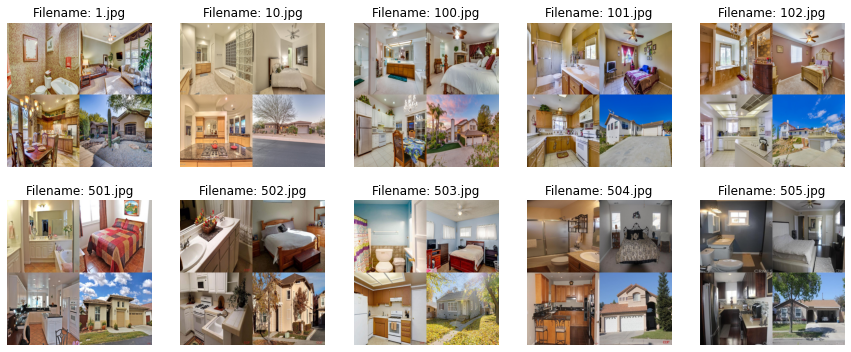

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
# Pad naar de mappen met afbeeldingen
test_folder_path = r"Test"
train_folder_path = r"Train"

# Lijsten om afbeeldingen op te slaan
train_images = []
test_images = []

# Laden van afbeeldingen uit de train map
for filename in os.listdir(train_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        image_path = os.path.join(train_folder_path, filename)
        image = Image.open(image_path)
        train_images.append((image, filename))

# Laden van afbeeldingen uit de test map
for filename in os.listdir(test_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        image_path = os.path.join(test_folder_path, filename)
        image = Image.open(image_path)
        test_images.append((image, filename))

# Weergeven van de eerste paar afbeeldingen met bestandsnaam
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Weergeven van de eerste 5 afbeeldingen uit de train map
for ax, (image, filename) in zip(axes.flatten(), train_images[:5]):
    ax.imshow(image)
    ax.set_title(f"Filename: {filename}")
    ax.axis("off")
    
# Weergeven van de eerste 5 afbeeldingen uit de test map
for ax, (image, filename) in zip(axes.flatten()[5:], test_images[:5]):
    ax.imshow(image)
    ax.set_title(f"Filename: {filename}")
    ax.axis("off")

plt.show()

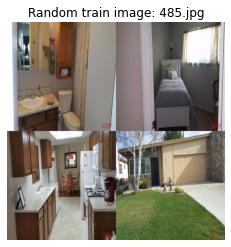

In [6]:
import random

# Selecteer een willekeurige afbeelding uit de trainingsset
random_train_image = random.choice(train_images)
random_train_image_data, random_train_image_filename = random_train_image

# Toon de willekeurige afbeelding
plt.imshow(random_train_image_data)
plt.title(f"Random train image: {random_train_image_filename}")
plt.axis("off")
plt.show()

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat we hier gaan checken is of de .jpegs overeen komen met de House ID's van de Dataset:</strong>
</div>



In [7]:
train_jpeg = []
test_jpeg = []

for file_info,jpeg_name in train_images:
    train_jpeg.append(jpeg_name)

for file_info,jpeg_name in test_images:
    test_jpeg.append(jpeg_name)
display(train_jpeg[:5], test_jpeg[:5])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg']

['501.jpg', '502.jpg', '503.jpg', '504.jpg', '505.jpg']

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>We importeren de library Natsort om de train lijst te sorteren op volgorde:</strong>
</div>


In [8]:
from natsort import natsorted
train_jpeg = natsorted(train_jpeg)

display(train_jpeg)


['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg',
 '92.jpg

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Opdracht 1: EDA </strong></h2>
</div>

In [9]:
test.head()

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228


In [10]:
train.head()

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


In [11]:
display(test.info(),train.info())

display(test.describe(), train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   35 non-null     int64  
 1   Bedrooms   35 non-null     int64  
 2   Bathrooms  35 non-null     float64
 3   Area       35 non-null     int64  
 4   Latitude   35 non-null     float64
 5   Longitude  35 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   500 non-null    int64  
 1   Bedrooms   500 non-null    int64  
 2   Bathrooms  500 non-null    float64
 3   Area       500 non-null    int64  
 4   Latitude   500 non-null    float64
 5   Longitude  500 non-null    float64
 6   Price      500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


None

None

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,518.000000,3.771429,2.600000,2297.171429,36.631043,-120.662114
std,10.246951,0.910259,0.591608,1457.127886,1.837672,1.670038
min,501.000000,2.000000,1.500000,987.000000,33.808500,-121.775800
25%,509.500000,3.000000,2.000000,1580.000000,34.724550,-121.775800
50%,518.000000,4.000000,2.500000,2012.000000,37.965800,-121.775800
75%,526.500000,4.000000,3.000000,2387.500000,37.965800,-119.311550
max,535.000000,7.000000,4.000000,9536.000000,37.965800,-117.922800


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,250.500000,3.350000,2.669500,2369.64600,35.128844,-116.469049,5.980218e+05
std,144.481833,1.172283,1.017578,1208.18261,2.386173,6.554434,5.240649e+05
min,1.000000,1.000000,1.000000,701.00000,32.631500,-122.368300,2.200000e+04
25%,125.750000,2.000000,2.000000,1440.00000,33.808200,-119.802500,2.350000e+05
50%,250.500000,3.000000,2.500000,2097.50000,33.920800,-117.609600,5.300000e+05
75%,375.250000,4.000000,3.000000,3104.50000,35.640600,-116.371300,7.490000e+05
max,500.000000,10.000000,7.000000,9583.00000,47.791800,-87.885900,5.858000e+06


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Beschrijving:</strong>
</div>

De trainingsdataset bevat meer gegevens dan de testdataset, wat normaal is in een machine learning scenario waarbij een deel van de data wordt gebruikt om het model te trainen en een ander deel om het model te evalueren. Beide datasets hebben dezelfde kolommen en datatypes, wat belangrijk is om ervoor te zorgen dat het model eens gelijke kenmerken heeft tijdens zowel de training als de evaluatie. Het ontbreken van missende waarden in beide datasets is handig, omdat dit helpt om mogelijke complicaties tijdens het trainen van het model te voorkomen.

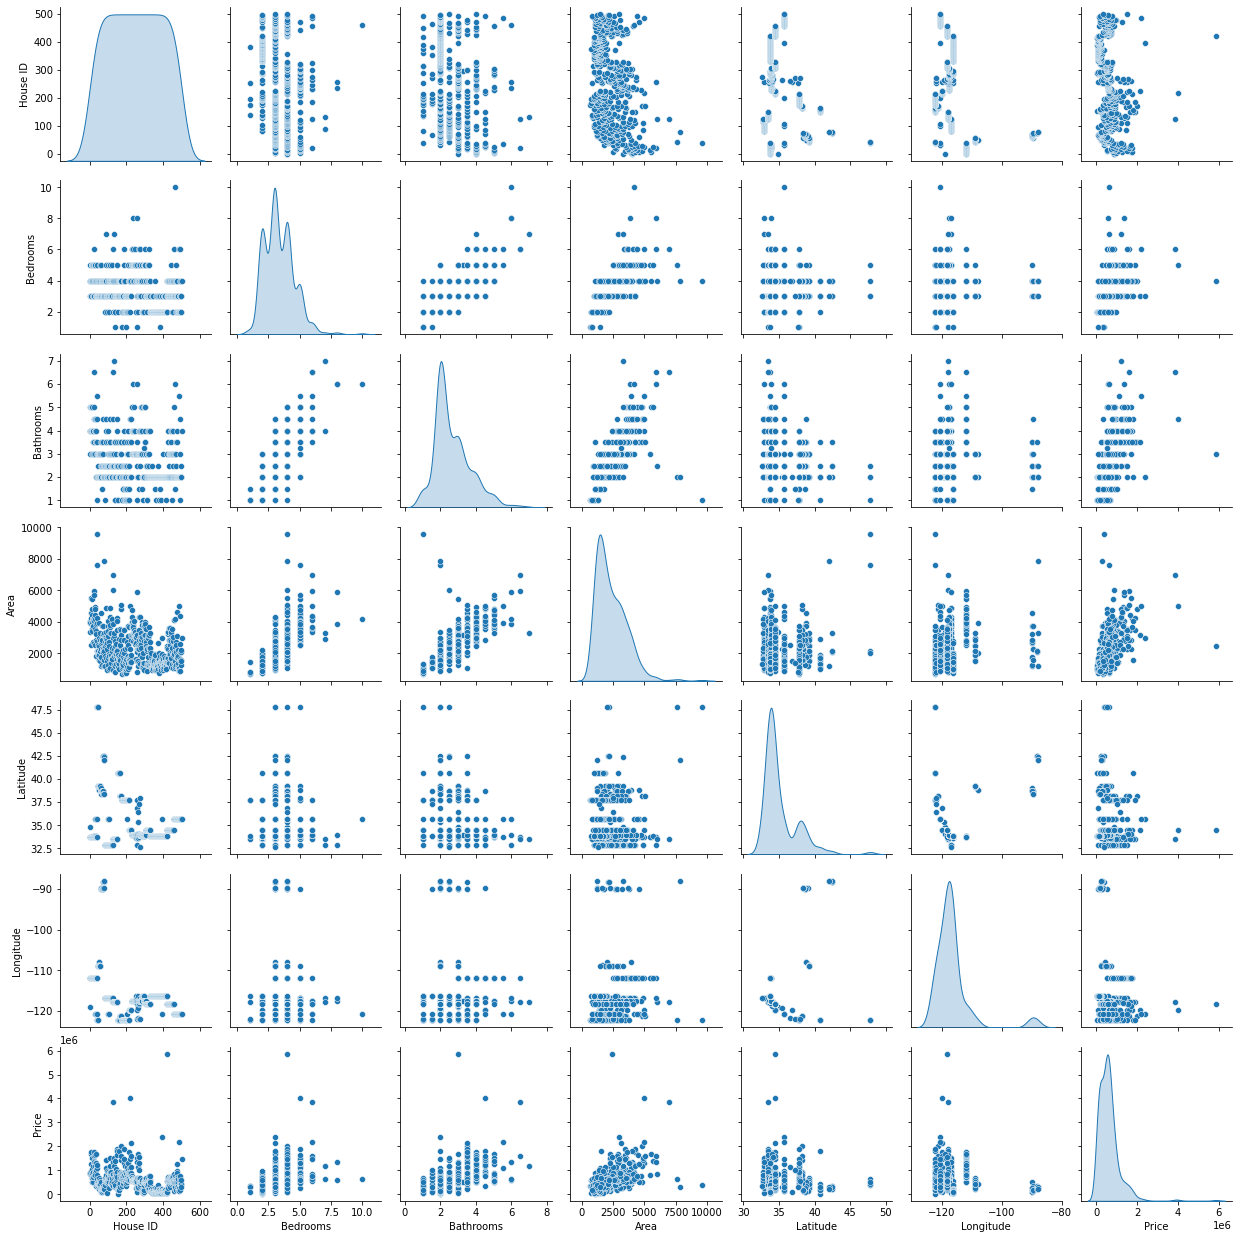

In [12]:
sns.pairplot(train, diag_kind = 'kde')
plt.show()

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Beschrijving:</strong>
</div>

Aan de hand van de pairplot kunnen wij bekijken of er lineaire of niet-lineaire relaties zijn tussen de kenmerken. Met behulp van de scatterplots kunnen wij de relatie tussen elk paar kenmerken te observeren. Wanneer de punten een rechte lijn maken is het een lineaire relatie. Dit betekent dat ze lineair samenhangen, als het ene kenmerk stijgt, stijgt de ander ook. Terwijl als de punten een gebogen patroon of geen lineair patroon toont. Betekent dit dat er een niet-lineaire relatie is. Wanneer dit is zullen wij deze observering moeten toepassen bij het modelleren.

Wij zien hier alleen bij bedrooms, bathrooms en area dat er een redelijke lineaire relatie te zien is. Bij de andere scatterplots is er geen lineaire relatie te zien.

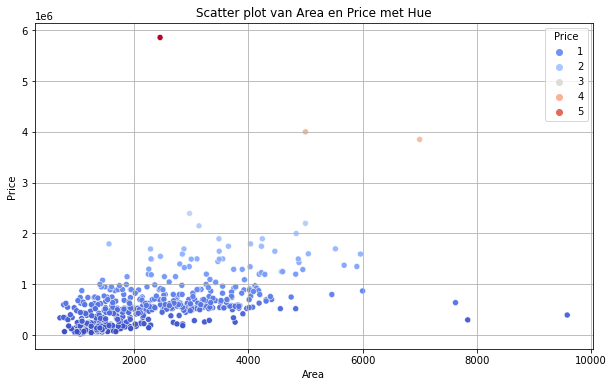

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Area', y='Price', hue = 'Price',palette='coolwarm')  
plt.title('Scatter plot van Area en Price met Hue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Beschrijving:</strong>
</div>

Hier zien wij een paar opvallende uitschieters in de data. Wij merken specifiek op dat er een rood datapunt is met minder 'area' die meer heeft betaald dan een blauwe datapunt met veel meer 'area'.

Deze bevindingen zijn belangrijk omdat ze wijzen op potentiële anomalieën in de data, waarbij de relatie tussen 'area' en 'price' niet altijd lineair is of niet aan de verwachtingen voldoet. Inzicht in deze uitschieters is cruciaal, omdat ze de nauwkeurigheid van het voorspellingsmodel kunnen beïnvloeden.

Het is van belang om deze uitschieters verder te onderzoeken om te begrijpen wat de oorzaken kunnen zijn. Mogelijke verklaringen kunnen zijn: unieke kenmerken van de woningen, zoals locatie, voorzieningen of architectuur, fouten in de data, zoals meetfouten of ontbrekende informatie, of andere externe factoren die van invloed kunnen zijn op de prijs van een woning.

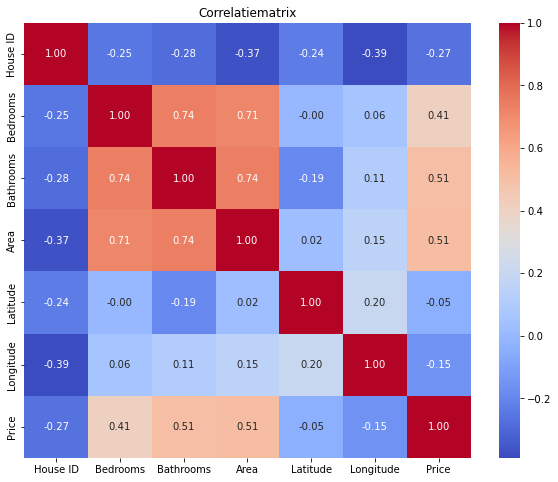

In [14]:
corr_matrix = train.corr()

# Plot de heatmap
plt.figure(figsize=(10, 8))  # Aanpassen van de grootte van de plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  
# annot=True voegt de correlatiecoëfficiënten toe aan de heatmap, cmap is het kleurenschema, fmt=".2f" zorgt voor de juiste notatie van de annotaties
plt.title('Correlatiematrix')
plt.show()

<div style="background-color:#006069; color: white; padding: 10px;">
    <strong>Beschrijving:</strong>
</div>

Dit patroon is goed te zien in zowel de pairplot als de correlatieheatmap. De sterke positieve relatie tussen 'bedrooms', 'bathrooms' en 'area' suggereert dat huizen met meer slaapkamers vaak ook meer badkamers hebben, en vice versa. Bovendien vereist een groter aantal slaapkamers en badkamers meestal ook meer ruimte, wat wordt weerspiegeld in de positieve relatie met 'area'. Dit verklaart waarom deze kenmerken een sterke positieve correlatie vertonen met elkaar.

Daarnaast is het interessant op te merken dat deze kenmerken ook een matige positieve correlatie vertonen met de 'price'. Aangezien huizen met meer slaapkamers, badkamers en een grotere oppervlakte vaak als luxueuzer worden beschouwd, is het logisch dat deze kenmerken een invloed hebben op de prijs van een huis.

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Opdracht 2: Fully-connected neuraal netwerk  </strong></h2>
</div>

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential


<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; text-align: center;">
    <h2 style="font-size: 24px; color:white"><strong>Fully-connected neuraal Network Uitleg</h2>
    </div>
</div>


Een fully connected layer is een component van een neuraal netwerk waar elke input node verbonden is met elke output node. Dit betekent dat elke input invloed heeft op elke output. Neuronen in een fully connected layer passen lineaire transformaties toe op de input vector via een gewichtsmatrix, gevolgd door een niet-lineaire activatiefunctie. De naam "fully connected" of "densely connected" komt van het feit dat alle mogelijke verbindingen van laag tot laag aanwezig zijn, hoewel niet alle gewichten invloed hebben op alle outputs.

Het verschil tussen een fully connected layer en een convolutional layer is dat in een fully connected layer, alle nodes met elkaar verbonden zijn, terwijl in een convolutional layer, niet alle nodes verbonden zijn. In convolutional neural networks worden gewichten gedeeld over verschillende delen van de input, wat helpt bij het extraheren van ruimtelijke kenmerken uit de data, zoals bij beeldverwerkingstaken.

Door gebruik te maken van fully connected layers en convolutional layers, kunnen neurale netwerken complexe patronen leren en begrijpen in verschillende soorten data, zoals afbeeldingen, tekst, en numerieke data.

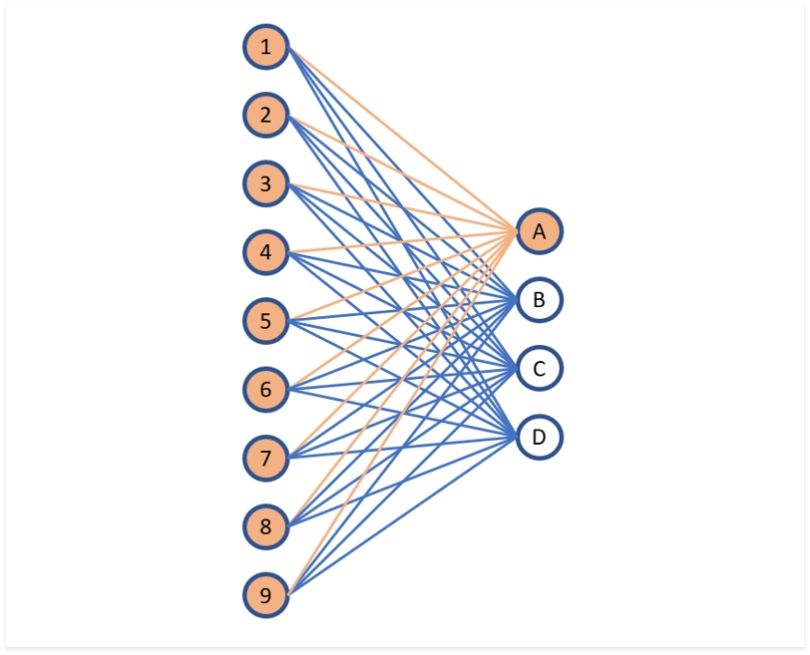
Unzueta, D. (2022, 19 oktober)

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Splitten van de Data:</strong>
</div>

In [16]:
display(train.head())

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


In [17]:
X = train.drop("Price", axis=1)
y = train["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
display(X_train.head(),y_train.head)

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
249,250,4,3.0,3000,33.9208,-117.6096
433,434,3,2.0,1387,34.4835,-118.1959
19,20,3,3.5,4143,33.7669,-111.9182
322,323,5,3.0,3167,34.4835,-118.1959
332,333,2,2.0,1152,33.8082,-116.3713


<bound method NDFrame.head of 249    529900
433    395000
19     925000
322    599900
332    138500
        ...  
106    529000
270    999000
348     67500
435    479000
102    245900
Name: Price, Length: 400, dtype: int64>

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Data Normaliseren:</strong>
</div>

In [19]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Model:</strong>
</div>

In [20]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Definieer het model
model = keras.Sequential([normalizer,
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Definieer de optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# Compileer het model
model.compile(optimizer=optimizer, loss='mape')

# Definieer de early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=200, verbose=1, restore_best_weights=True)

# Definieer de learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=100 ,min_lr=0.0001)

# Train het model met early stopping en learning rate scheduler
history = model.fit(X_train, y_train, epochs=5000, verbose=True, validation_split=0.3, batch_size=256, callbacks=[early_stopping, lr_scheduler])

# Voorspel op de testset
y_pred = model.predict(X_test)


Epoch 1/5000

2/2 [==============================] - 2s 314ms/step - loss: 100.0000 - val_loss: 99.9999 - lr: 0.0100
Epoch 2/5000
2/2 [==============================] - 0s 40ms/step - loss: 99.9999 - val_loss: 99.9998 - lr: 0.0100
Epoch 3/5000
2/2 [==============================] - 0s 37ms/step - loss: 99.9998 - val_loss: 99.9995 - lr: 0.0100
Epoch 4/5000
2/2 [==============================] - 0s 40ms/step - loss: 99.9994 - val_loss: 99.9988 - lr: 0.0100
Epoch 5/5000
2/2 [==============================] - 0s 39ms/step - loss: 99.9986 - val_loss: 99.9973 - lr: 0.0100
Epoch 6/5000
2/2 [==============================] - 0s 41ms/step - loss: 99.9969 - val_loss: 99.9940 - lr: 0.0100
Epoch 7/5000
2/2 [==============================] - 0s 39ms/step - loss: 99.9931 - val_loss: 99.9872 - lr: 0.0100
Epoch 8/5000
2/2 [==============================] - 0s 39ms/step - loss: 99.9854 - val_loss: 99.9742 - lr: 0.0100
Epoch 9/5000
2/2 [==============================] - 0s 41ms/step - loss: 99.9703 - va

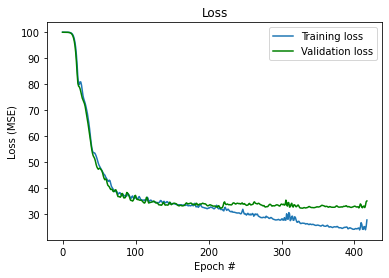

In [21]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MSE)')
plt.title('Loss')
plt.legend()



<div style="background-color:#006069; padding: 6px;">   
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Keuze van de Loss Function</h2>
    </div>
</div>

De metric die wordt gebruikt om de voorspellingen te evalueren is de "mean absolute percentage error" (MAPE). Deze metric is relevant bij het voorspellen van de verkoopprijzen van huizen, omdat het fouten bestraft die evenredig zijn aan de werkelijke waarden (een fout van €50.000 is veel ernstiger voor een huis van €100.000 vergeleken met een huis van €1.000.000). RMSE bijvoorbeeld kan een heel hoog getal zijn omdat het verschil tussen een goedkoop en duur huis aanzienlijk groot kan zijn dus dan liggen de waardes erg uit elkaar. Een MAPE van 0,33 betekent dat je model gemiddeld 33% fout heeft op de voorspelling, vergeleken met de werkelijke verkoopprijs.

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Keuze van Hyper Parameters en aantal Epochs</h2>
    </div>
</div>

##### Keuze aantal neuronen

het aantal neuronen per laag is zo gekozen om de complexiteit van het model te beheren. We nemen geleidedelijk de neuronen per laag af van 128 tot 8 zodat de voorspellingen per laag word gesquisht in een minder complexe laag. Dit zou er dan voor zorgen dat het model minder complexe of onnodige patronen zou leren.

##### Activatie van layers
De activatie van de layers is ReLu in de Dense layers, dit was het meest effectief voor het regressieprobleem  en gaf de beste scores voor ons model, en activatie van Linear in de output layer dit gaf betere scores waarschijnlijk door de compabiliteit met de loss (mape)

##### EarlyStopping
We gebruiken EarlyStopping met een patience van 200 epochs, we hebben gekozen voor 200 epochs patience zodat we niet te veel informatie verliezen en dit zorgde voor een betere overall Mape dan bij lagere patience waardes. Als het model binnen 200 epochs niet verbeterd stopt het model vroegtijdig dit helpt tegen de overfitting. Ook hebben we "Restore_Best_Weights" op true zodat hij de beste loss epoch pakt bij het einde van het model.

##### Learning Rate Scheduler
Ook gebruiken we een LR_scheduler om er voor te zorgen dat de learning rate dynamisch wordt aangepast tijdens het trainen van het model. Dit helpt met het optimaliseren van het trainingsprocess

##### Epoch keuze
We hebben gekozen voor een hele hoge epoch waarde van 5000. Dit hebben we gekozen sinds er toch early stopping is en als we dan willen spelen met de data weet je tenminste altijd dat je niet te weinig epochs traint dan dat het model mogelijk kan trainen



<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Optimizer Uitleg</h2>
    </div>
</div>

Adam (Adaptive Moment Estimation) is een optimalisatie-algoritme dat wordt gebruikt om neurale netwerken te trainen in machine learning en deep learning. Het combineert ideeën van de AdaGrad- en RMSProp-algoritmen. Adam past de leersnelheid per parameter aan op basis van de geschiedenis van gradients en maakt gebruik van exponentiële gemiddelden van vorige gradients om de eerste en tweede momenten te schatten. Hierdoor kan Adam effectief omgaan met verschillende soorten optimalisatieproblemen en convergeert het vaak sneller dan traditionele optimalisatie-algoritmen zoals SGD (stochastic gradient descent).

We hebben meerdere optimizers geprobeerd maar Adam had altijd de beste score Adam

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Model Architechtuur</h2>
    </div>
</div>

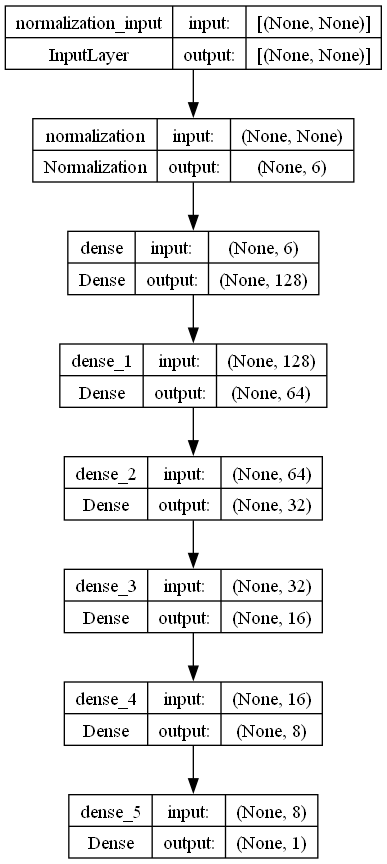

In [22]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Kaggle  </strong></h2>
</div>

In [23]:
import pandas as pd

#Maak voorspellingen op de testdataset met het getrainde model
y_pred = model.predict(test)

#Laad de testdataset met huis-ID's
test_ids_df = test  

# Maak een DataFrame met de voorspelde prijzen en de huis-ID's van de testset
predictions_df = pd.DataFrame({
    'House ID': test_ids_df['House ID'], 
    'Price': y_pred.flatten()  
})
#Slaat het bestand op als een CSV-bestand
predictions_df.to_csv('predictions.csv', index=False)


predictions_df



2/2 [==============================] - 0s 4ms/step


,House ID,Price
0,501,5.037008e+05
1,502,3.997552e+05
2,503,4.162967e+05
3,504,5.752647e+05
4,505,3.432133e+05
5,506,2.984258e+05
6,507,2.771316e+05
7,508,2.772216e+05
8,509,3.737359e+05
9,510,2.144104e+05


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Convolutioneel neuraal netwerk  </strong></h2>
</div>

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Convolutioneel Neuraal Netwerk Uitleg</h2>
    </div>
</div>


Convolutionele Neurale Netwerken zijn specifieke klasse van diepe neurale netwerken die zijn ontworpen voor taken zoals beeldclassificatie en object detectie. Het gebruikt convolutielagen die helpen bij het extraheren van kenmerken uit de invoerbeelden. Bij de convolutielagen worden filters toegepast op de invoerbeelden. De filters detecteren patronen en kenmerken, denk aan randen, texturen en vormen. Tijdens het trainen passen de filters zich automatisch aan om relevante kenmerken te identificeren. 

CNN bestaat uit een input layer, hidden layers en een output layer. In de hidden layers zit er bij een convolutionaal netwerk één of meer convolutie layers(Wikipedia contributors, 2024). Na de convolutielagen volgen vaak een pooling layer. Dit verkleint de dimensies om de belasting op de computer te verminderen. Er kunnen ook fully-connected layers toegepast worden, hier kunnen de kenmerken van de featuremaps worden omgezet in een enkele vector. 

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dc/RoI_pooling_animated.gif" width="300">

In [24]:
train_images

[(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDAF880>,
  '1.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF57C0>,
  '10.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF5820>,
  '100.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF58B0>,
  '101.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF5910>,
  '102.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF5970>,
  '103.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF59D0>,
  '104.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF5A30>,
  '105.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF5A90>,
  '106.jpg'),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x2026CDF5AF0>,
  '107.jpg'),
 (<

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Batchsize en image instellingen</h2>
    </div>
</div>

In [25]:
batch_size = 4
img_height = 1024
img_width = 1024

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 1 classes.
Using 400 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 1 classes.
Using 100 files for validation.


In [28]:
from pathlib import Path
image_file_paths = train_ds.file_paths

# Extract only file ID without extension from file paths
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

labels = [train.loc[train['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset = tf.data.Dataset.zip((train_ds, labels_dataset))

In [29]:
from pathlib import Path
image_file_paths = val_ds.file_paths

# Extract only file ID without extension from file paths
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

labels = [train.loc[train['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset_val = tf.data.Dataset.zip((val_ds, labels_dataset))

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = final_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = final_dataset_val.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:

img_height, img_width = 256, 256  # Define your desired image size
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))

In [32]:
rescaling = keras.layers.Rescaling(1./255)

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Batchsize en image instellingen Uitleg</h2>
    </div>
</div>

**Batch Size**

De 'batch size' bepaalt het aantal voorbeelden dat tegelijkertijd wordt verwerkt tijdens één iteratie. Hier is de batch size 4 dit betekent dat het model wordt getrained op 4 afbeeldingen tegelijk. Een kleinere 'batch size' kan resulteren in meer iteraties per epoch, wat de nauwkeurigheid van het model kan verbeteren. 

**Afmetingen van de afbeeldingen**

De afmetingen van de afbeeldingen waren oorspronkelijk 1024x1024. Deze hoge resolutie hebben wij behouden zodat er geen informatie verloren gaat. De foto's bevatten kamers, hier is het cruciaal dat er niets van de kamer verloren gaat. 

**Image dataset from directory**

Met behulp van de 'image_dataset_from_directory' utility-functie van TensorFlow worden de afbeeldingen ingeladen vanuit de gegeven map. Hierbij wordt een deel toegewezen aan training en 20% wordt toegewezen aan validatie. 


**Cache, Shuffle en Prefetch**

Deze methoden worden toegepast op de trainings- en validatiesets om de prestaties van het model te verbeteren. Het cachen van de dataset in het geheugen zorgt voor snellere toegang tot de gegevens. Het shuffelen van de gegevens helpt bij het voorkomen van overfitting door de volgorde van de voorbeelden te verstoren. Prefetch verhoogt de efficiëntie van het trainingsproces, omdat de GPU nooit hoeft te wachten op de gegevens. 

**Resizing**

Uiteindelijk worden de afbeeldingen toch geresized, om de berekeningsefficiëntie te verbeteren en de trainingsstabiliteit te verhogen. De afbeeldingen zijn geresized naar 256x256 pixels. Zo hebben alle afbeelding dezelfde grootte, dit is vooral belangrijk bij het gebruik van convolutionele lagen. 

(Beeldclassificatie met CNNs, 2024)

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Model trainen en compilen</h2>
    </div>
</div>

In [33]:
cnn_model = keras.Sequential([
    rescaling,
    keras.layers.Conv2D(126, activation='relu', kernel_size=3, input_shape=(256,256,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(126, activation='relu', kernel_size=3),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(126, activation='relu', kernel_size=3),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

cnn_model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), loss='mape')
history = cnn_model.fit(train_ds, validation_data=val_ds ,epochs=10, callbacks=[stop_early])


Epoch 1/10


100/100 [==============================] - 110s 826ms/step - loss: 79.6786 - val_loss: 80.3680
Epoch 2/10
100/100 [==============================] - 74s 728ms/step - loss: 69.8470 - val_loss: 92.3058
Epoch 3/10
100/100 [==============================] - 70s 704ms/step - loss: 70.6439 - val_loss: 68.2753
Epoch 4/10
100/100 [==============================] - 73s 727ms/step - loss: 64.6818 - val_loss: 75.9953
Epoch 5/10
100/100 [==============================] - 73s 734ms/step - loss: 61.0419 - val_loss: 71.8159
Epoch 6/10
100/100 [==============================] - 73s 733ms/step - loss: 58.7417 - val_loss: 73.4963


<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Keuze Hyper Parameters en aantal Epochs</h2>
    </div>
</div>

**Keuze aantal neuronen**

Het aantal neuronen per laag is gekozen om de complexiteit van het model te beheren. In dit geval worden drie Conv2D-lagen gebruikt, elk met 126 neuronen. Dit kan helpen bij het extraheren van verschillende niveaus van abstracte kenmerken uit de invoerbeelden.

**Activatie van lagen**

ReLU, afgekort voor Rectified Linear Unit, wordt gebruikt als activatiefunctie in de Conv2D-lagen. ReLU wordt vaak gebruikt, omdat het helpt bij het introduceren van niet-lineairiteit in het model en het vermijden van het probleem van de verdwijnende gradiënt tijdens het trainen. Bij de output layer wordt de activatiefunctie niet gespecifeerd, wat betekent dat de output van de laatste layer lineaire activiteiten zal hebben. 

**EarlyStopping**

EarlyStopping wordt toegepast met een 'patience' van 3 epochs. Dit betekent dat als de 'val_loss' gedurende drie epochs niet verbeterd stopt het model met trainen. EarlyStopping helpt bij het voorkomen van overfitting en het bespaart tijd. 

**Epoch keuze**

Het model wordt getraint op een klein aantal (10) epochs in vergelijking met de eerdere gemaakte Fully-Connected model met de gekozen waarde van 5000 epochs. Dit kan veroorzaakt worden doordat CNN's sneller convigeren en minder gevoelig zijn voor overfitting, vooral in combinatie met EarlyStopping

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Model Architechtuur</h2>
    </div>
</div>

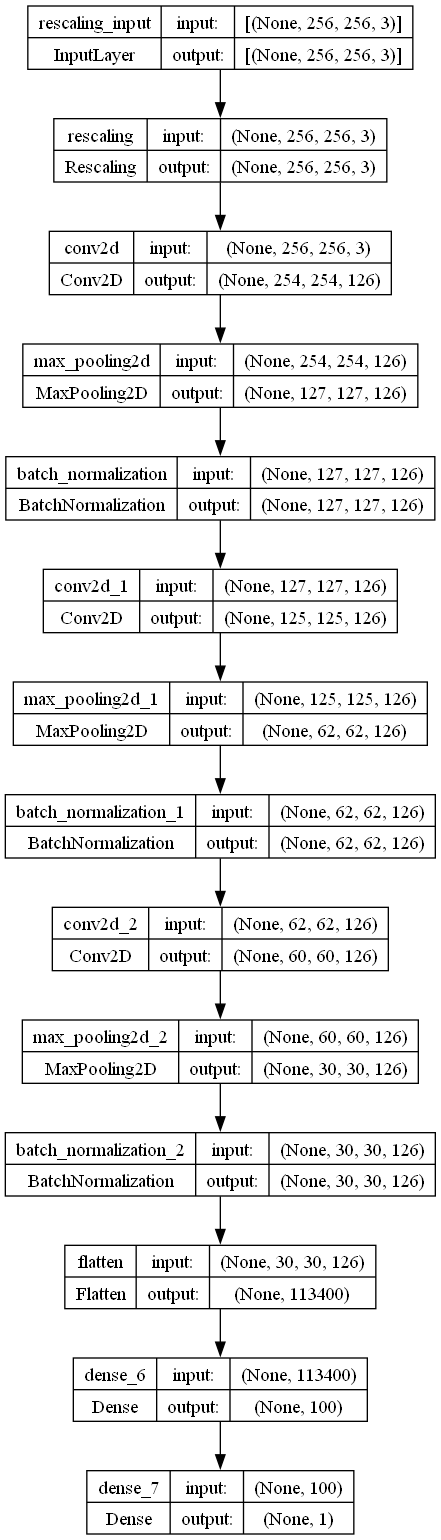

In [34]:

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

tf.keras.utils.plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px;  color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Visualisatie CNN model</h2>
    </div>
</div>

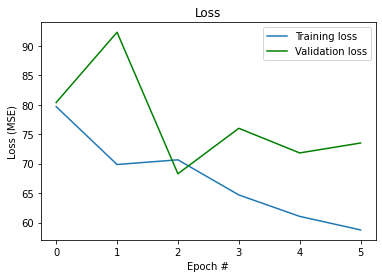

In [35]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MSE)')
plt.title('Loss')
plt.legend()

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Transfer learning</strong></h2>
</div>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
from natsort import natsorted

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pathlib import Path

import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

De derde methode die wij gaan toepassen is transfer learning. Bij deze methode gebruiken wij alleen de afbeeldingen en de bijbehorende labels.

In de wereld van deep learning maken we vaak gebruik van Transfer Learning. Transfer Learning is een krachtige techniek binnen machine learning waarbij een eerder getraind model wordt hergebruikt voor een ander, gerelateerd probleem. Deze aanpak maakt het mogelijk om de kennis die is vergaard bij het trainen van een model op een probleem met veel beschikbare data, over te dragen naar een ander probleem waar minder data beschikbaar is. Hierdoor kunnen we profiteren van de representaties en patronen die al zijn geleerd door het oorspronkelijke model, wat vaak leidt tot betere prestaties en een efficiënter gebruik van computermiddelen.(Donges, 2022)

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Gekozen Modelarchitectuur en Dataset</h2>
    </div>
</div>

### **Gekozen Modelarchitectuur**

Tijdens het onderzoeken van naar basisarchitecturen voor ons transfer learning model hebben wij drie architecturen onderzocht. Dit waren VGG16, InceptionV3 en ResNet-50.

Uiteindelijk hebben wij ervoor gekozen om ResNet-50 als basis te gebruiken. Hiervoor waren meerder redenen. 
Als eerste heeft het ResNet-50 model een diepere architectuur dan VGG16 en InceptionV3. Zo bestaat VGG16 uit 16 lagen en InceptionV3 uit 48 lagen. Zoals de naam al weggeeft bestaat het ResNet-50 model uit 50 lagen. Door de diepere architectuur is het model beter in het leren van complexe patronen in de afbeeldingen.

Verder presteert het ResNet-50 model over het algemeen beter dan de andere twee modellen en wordt het ResNet-50 model meer gebruikt binnen deep learning. Zo kunnen wij bij fout meldingen en vragen over het model online meer documentatie vinden.(Yan, 2023)

### **Dataset**

Het ResNet-50 model is vooraf getraind. Hiervoor wordt gebruik gemaakt van de ImageNet-dataset.
Dit is een dataset die meer dan 14 miljoen afbeeldingen bevat. Elk van deze afbeeldingen zijn met de hand geannoteerd, deze annotatie wordt gedaan volgens de WordNet hierarchie. Aan de hand van deze annotatie wordt duidelijk wat voor objecten op de afbeeldingen staan. Verder zijn er bij meer dan 1 miljoen ook bounding boxes toegevoegd, deze geven de exacte locatie van de objecten aan.
Verder is de dataset opgebouwd uit meer dan 20.000 categorien waarbij elke categorie honderden afbeeldingen bevatten.(Wikipedia contributors, 2024) 



<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Voordelen pretrained models</h2>
    </div>
</div>

Het gebruik van pretrained models brengt meerdere voordelen met zich mee. Deze zullen wij hieronder toelichten.

Overdracht van kennis:
Pretrained modellen hebben al geleerd om algemene kenmerken en patronen te herkennen. Dit was mogelijk doordat ze al getrained zijn op grote datasets. Hierdoor kan het model zijn eerder geleerde kennis overdragen naar nieuwe problemen of datasets. Zo kan het model profiteren van de eerdere leerervaringen en heeft het minder data nodig om de nieuwe taken goed uit te voeren.

Kortere trainings tijd:
Door gebruik te maken van pretrained modellen als basis architectuur kan de trainingstijd worden verminderd. Zo is er minder fine-tuning nodig. Dit zorgt ervoor dat het neurale netwerk niet vanaf het begin alles moet trainen.

Beter prestaties:
Doordat de modellen vooraf zijn getrained met grote hoeveelheden data kunnen de modellen beter spresteren op soortgelijke problemen.

Al met al kan het gebruik van pretrained models het deep learning proces versnellen, vooral gedurende het modelontwikkelings proces. De grote stappen in het proces zijn al doorlopen door de ontwikkelaars van de pretrained models. Zo hebben wij meer tijd over voor het fine-tunen van het model voor ons specifieke probleem.(Team, 2023)



<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Voorbereiding Transfer learning</h2>
    </div>
</div>

In [3]:
#Juiste afbeelding hoogste,breedte en batch size instellen
img_height, img_width = 256, 256
batch_size = 10

# Train dataset aanmaken
train_ds = tf.keras.utils.image_dataset_from_directory(
  'DL_CV/Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validatie dataset aanmaken
val_ds = tf.keras.utils.image_dataset_from_directory(
  'DL_CV/Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

train = pd.read_csv('DL_CV/train.csv')

#Train dataset labels

image_file_paths = train_ds.file_paths

#Labels extraheren
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

labels = [train.loc[train['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]

#Label lijst omzetten naar dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels d
final_dataset = tf.data.Dataset.zip((train_ds, labels_dataset))

#Validatie dataset labels

image_file_paths = val_ds.file_paths

# Extract only file ID without extension from file paths
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

labels = [train.loc[train['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset_val = tf.data.Dataset.zip((val_ds, labels_dataset))




train_ds = final_dataset.map(lambda x,y: (tf.image.resize(x, (img_height, img_width)),y))
val_ds = final_dataset_val.map(lambda x,y: (tf.image.resize(x,(img_height, img_width)),y))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 500 files.
Using 400 files for training.
Found 500 files.
Using 100 files for validation.


<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Het model bouwen</h2>
    </div>
</div>

In [6]:

batch_size = 10
img_height, img_width = 256, 256 


#Resnet50 downloaden met imagenet dataset.
resnet50_model = tf.keras.applications.ResNet50(input_shape=(img_height, img_width, 3),
                                                include_top=False,
                                                weights='imagenet')

# Bevries het model
resnet50_model.trainable = False

#preprocessing functie voor het ResNet50-model
preprocess_input = tf.keras.applications.resnet50.preprocess_input


preprocessing_layer = layers.Lambda(preprocess_input)


model_xfer = tf.keras.Sequential([
    tf.keras.Input(shape=(img_height, img_width, 3)),

    #data-augmentatie
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),

    #preprocessing-laag
    preprocessing_layer,

    #pretrained model toevoegen
    resnet50_model,

    
    layers.GlobalAveragePooling2D(),

    #Dropout voor regulering
    layers.Dropout(0.2),

    #Dense (fully connected) laag voor classificatie
    layers.Dense(128, activation='relu'),

    #Output laag
    layers.Dense(1, activation='linear')
])

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Compileren
base_learning_rate = 0.0010 #was eerst 0.0001
model_xfer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss='mean_absolute_percentage_error', 
                metrics=['mae'])

model_xfer.summary() 



history = model_xfer.fit(train_ds, validation_data=val_ds ,epochs=25, callbacks=[stop_early])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 764ms/step - loss: 99.9747 - mae: 571263.8125 - val_loss: 99.8640 - val_mae: 635778.1875
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 762ms/step - loss: 99.8318 - mae: 582823.6250 - val_loss: 99.5994 - val_mae: 635039.4375
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 753ms/step - loss: 99.5531 - mae: 583067.1250 - val_loss: 99.1660 - val_mae: 633830.0625
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 758ms/step - loss: 99.2430 - mae: 631542.5625 - val_loss: 98.5744 - val_mae: 632179.1250
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 738ms/step - loss: 98.4579 - mae: 583741.6250 - val_loss: 97.8046 - val_mae: 630030.1250
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 766ms/step - loss: 97.8467 - mae: 608368.1875 - val_loss: 96.8630 - val_mae: 627401.6875
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 911ms/step - loss: 97.0402 - mae: 586408.1875 - val_loss: 95.7519 - val_mae: 624300.3750
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 870ms/step - loss: 95.9702 - mae: 573774.

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MSE)')
plt.title('Loss')
plt.legend()

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Modelarchitectuur</h2>
    </div>
</div>

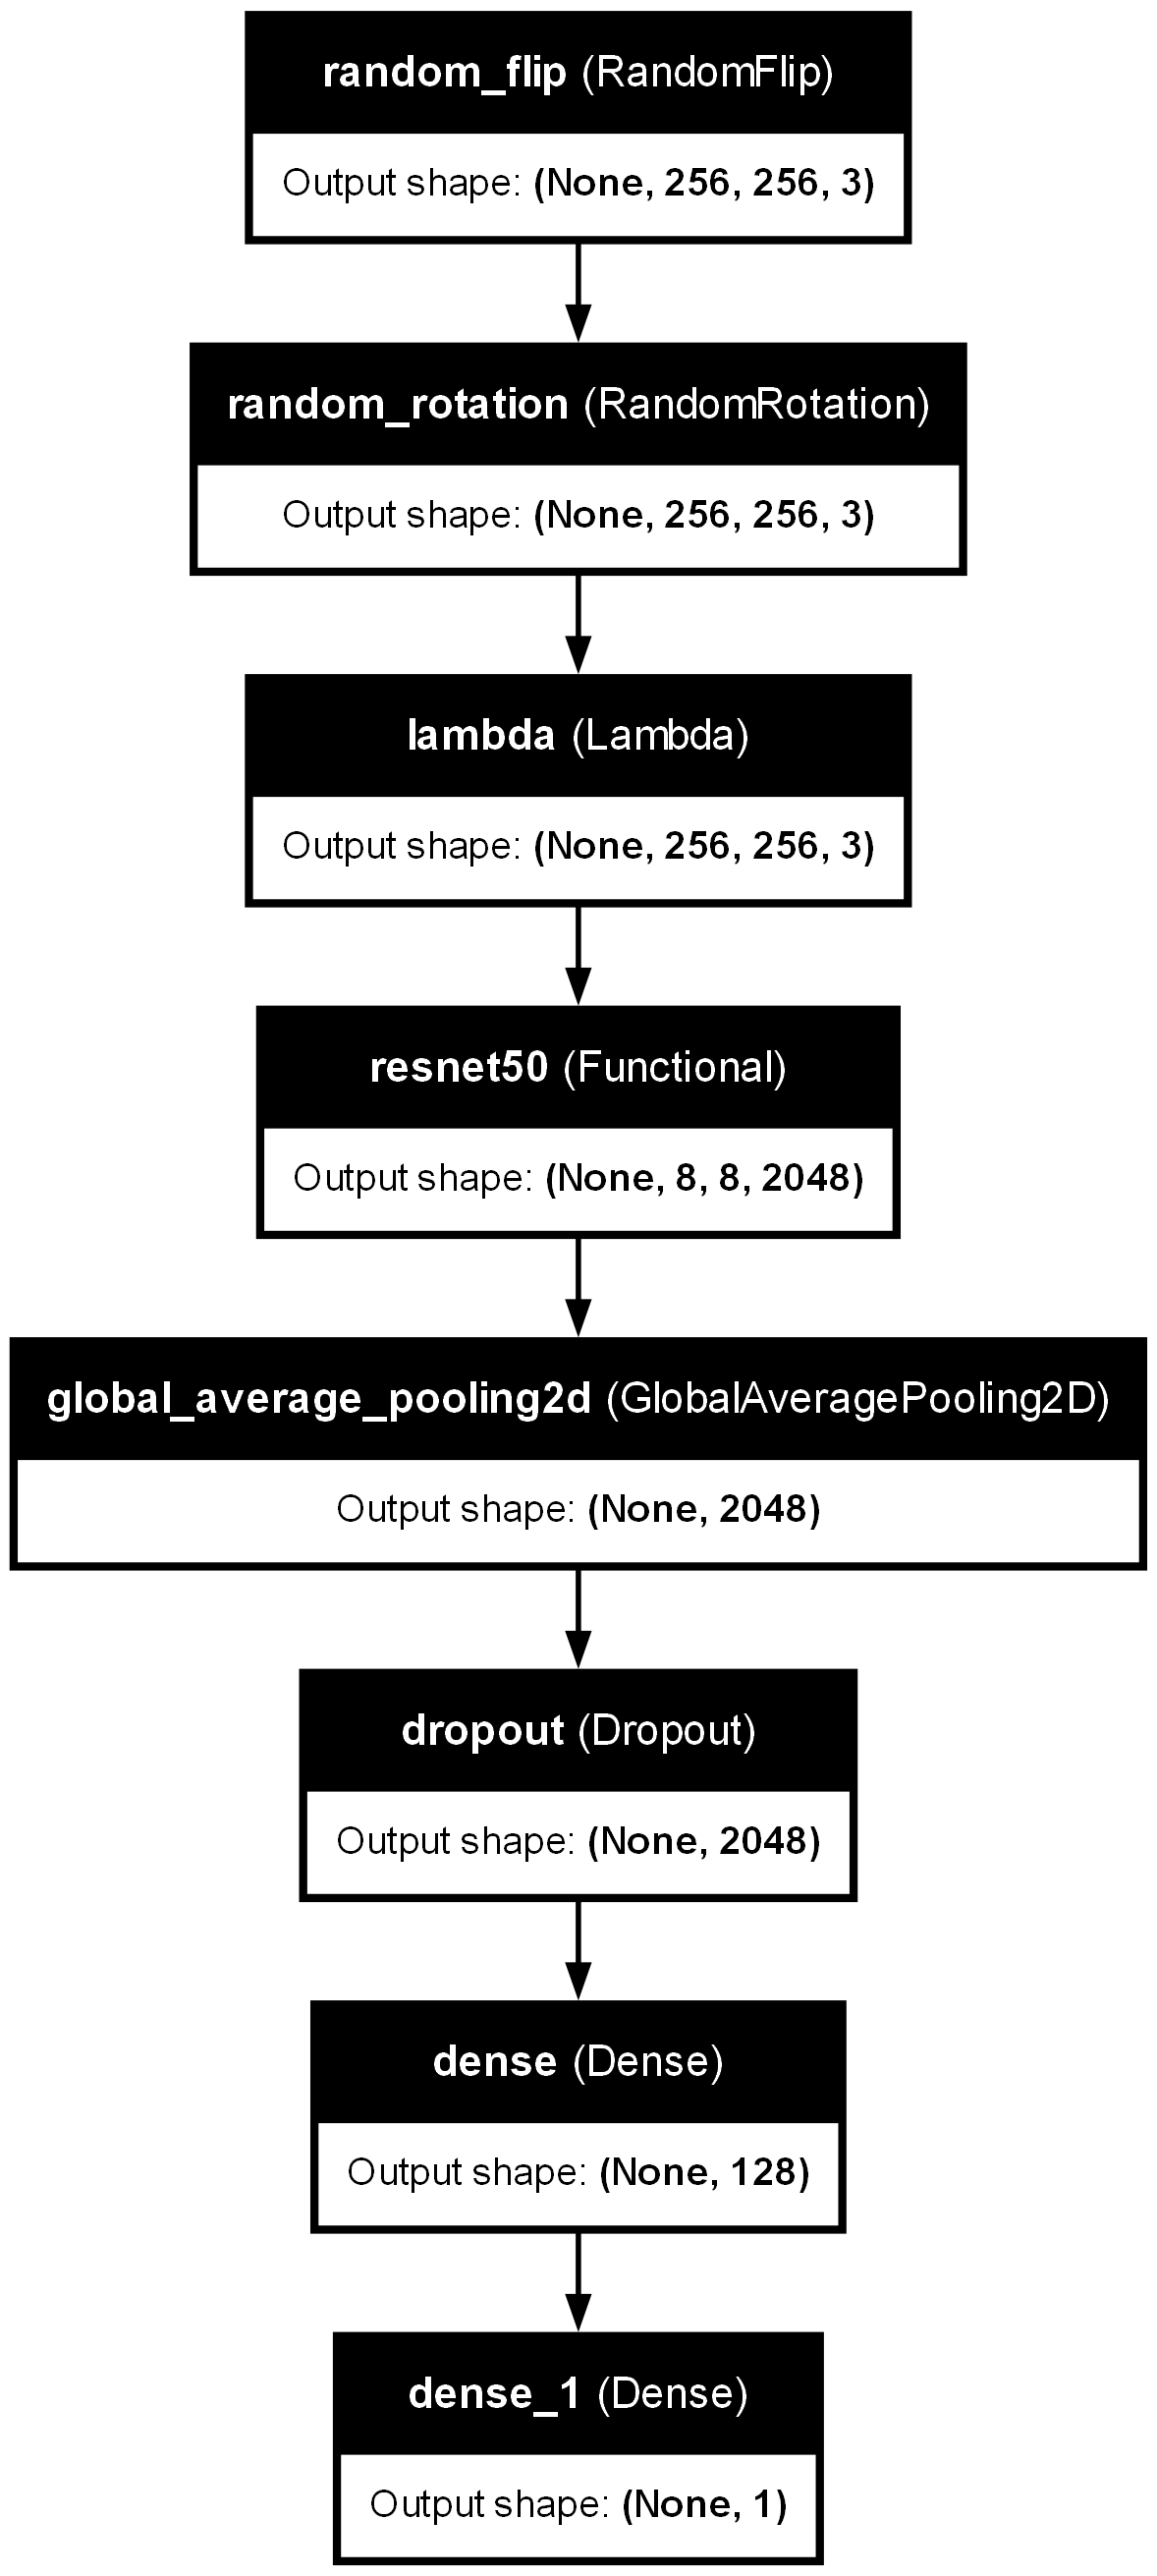

In [7]:
#Modelarchitectuur visualiseren

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

tf.keras.utils.plot_model(model_xfer, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px; color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Transfer learning stappen en hyperparameters</h2>
    </div>
</div>

Voor het maken van ons transfer learning model hebben we diverse stappen doorlopen. In de onderstaande tekst zullen we de benodigde stappen stap voor stap uitleggen.

1. Als eerste downloaden we het vooraf getrainde model ResNet-50, dat is getraind op de ImageNet-dataset. Zo hebben we als basisarchitectuur een model dat uitstekend is getraind in het detecteren van objecten en kenmerken in afbeeldingen. Vervolgens wordt het ResNet-50 model bevroren, waardoor de gewichten van het vooraf getrainde model niet worden bijgewerkt tijdens het trainingsproces. Op deze manier behoudt het model de kenmerken en patronen die zijn geleerd tijdens de training op de ImageNet-dataset.

2. Als tweede stap passen we data-augmentatie toe met behulp van RandomFlip en RandomRotation. Hiermee verbeteren we de robuustheid van het model en verminderen we overfitting.

3. De derde stap is het toevoegen van de preprocess_input laag. Hiermee worden de afbeeldingen uit onze eigen dataset genormaliseerd, wat een vereiste is voor het gebruik van het ResNet-50 model.

4. Stap vier is het definiëren van de modelarchitectuur. Dit wordt gedaan door een sequentieel model te bouwen, waarin de eerder genoemde lagen zoals RandomFlip, RandomRotation, preprocessing_layer en het ResNet-50 model worden toegevoegd. Daarna voegen we nieuwe lagen toe, zoals GlobalAveragePooling2D om de kenmerken te aggregeren, een dropout layer van 0.2 om overfitting te voorkomen, een fully connected laag met 128 neuronen met ReLU-activatie om de representaties verder te verfijnen, en ten slotte voegen we de outputlaag toe met lineaire activatie vanwege het regressieprobleem waarbij we continue waarden willen voorspellen (de prijs).

5. Bij stap vijf worden de verschillende configuraties ingesteld voor het trainingsproces, waarbij we het model compileren. We gebruiken opnieuw de Adam optimizer met een leersnelheid van 0.001, omdat uit testen bleek dat het model het beste presteerde met deze leersnelheid zonder aanzienlijke verlenging van de trainingsduur. De loss functie die we gebruiken is opnieuw MAPE, en we voegen ook MAE toe als extra metriek voor het evalueren van de prestaties.

6. De zesde stap die we doorlopen is het trainen van het model met behulp van de trainings- en validatiedatasets gedurende 25 epochs. We hebben waargenomen dat ons transfer learning model rond de 25 epochs slechter presteert en overfitting plaatsvindt. We hebben ook een EarlyStopping callback toegevoegd, die het trainingsproces zal stoppen wanneer er gedurende 3 epochs geen verbetering in de val_loss optreedt. We kozen een geduld van 3 om het model efficiënter te laten werken. Als we dit hoger hadden ingesteld, bleef het model te lang doortrainen zonder verbeteringen in de val_loss.

7. De laatste stap in ons transfer learning proces is het visualiseren van de loss. Dit doen we met behulp van matplotlib. Zo kunnen we gemakkelijk zien hoe de loss van zowel de training- als validatiedata zich gedraagt tijdens het trainingsproces. Dit geeft inzicht in de prestaties van het model en helpt bij het beoordelen van het leerproces. Met behulp van de visualisatie kunnen eventuele problemen zoals overfitting of underfitting worden geïdentificeerd en kunnen passende maatregelen worden genomen om de prestaties van het model verder te verbeteren. Op basis van deze visualisatie kunnen we vervolgens de voorgaande stappen in het proces aanpassen en finetunen.
(Baheti, 2023)



<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Multimodaal model  </strong></h2>
</div>

In [36]:
image_size = (256, 256)
batch_size = 64

In [37]:
image_dataset = tf.keras.utils.image_dataset_from_directory(
    "Train",
    label_mode=None,  # Ignore directory-based labels
    image_size=image_size,
    batch_size=batch_size
)

# Extract file paths from the dataset
image_file_paths = image_dataset.file_paths

# Extract only file ID without extension from file paths
image_uuids = [int(Path(image_file_path).stem) for image_file_path in image_file_paths]

# Map each file path to its tabular features using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
tabular_features = [train.loc[train['House ID'] == uuid, ['Bedrooms', 'Bathrooms', 'Area', 'Latitude', 'Longitude']].values[0] for uuid in image_uuids]

# Convert the list of tabular features into a TensorFlow dataset
tabular_features_dataset = tf.data.Dataset.from_tensor_slices(tabular_features).batch(batch_size)

# Map each file path to its label using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
labels = [train.loc[train['House ID'] == uuid, 'Price'].values[0] for uuid in image_uuids]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset = tf.data.Dataset.zip((image_dataset, tabular_features_dataset), labels_dataset)

Found 500 files belonging to 1 classes.


In [38]:
# Split dataset into training and validation

train_dataset = final_dataset.take(7) # Use 25 batches for training
val_dataset = final_dataset.skip(7) # Use remaining batches for validation

In [39]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(5).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px;  color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Model trainen en compileren</h2>
    </div>
</div>

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.optimizers import Adam

# Branch 1: Image Input
img_input = Input(shape=(256, 256, 3), name='img_input')
x1 = Conv2D(32, (3, 3), activation='relu')(img_input)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Conv2D(64, (3, 3), activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Conv2D(128, (3, 3), activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Flatten()(x1)

# Branch 2: Tabular Data Input
tab_input = Input(shape=(5,), name='tab_input')
x2 = Dense(64, activation='relu')(tab_input)
x2 = Dense(128, activation='relu')(x2)

# Concatenate the two branches
concatenated = concatenate([x1, x2])

# Additional Dense layers after concatenation
x = Dense(256, activation='relu')(concatenated)
x = Dense(128, activation='relu')(x)

# Output layer
output = Dense(1, activation='linear', name='output')(x)

# Create the model
model = Model(inputs=[img_input, tab_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mape')

# Model summary to check the architecture
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img_input (InputLayer)      [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 254, 254, 32)         896       ['img_input[0][0]']           
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)         0         ['conv2d_6[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 125, 125, 64)         18496     ['max_pooling2d_6[0][0]'

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3)

num_epochs = 25
history = model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs, callbacks=[early_stopping])

Epoch 1/25


7/7 [==============================] - 27s 4s/step - loss: 89.3307 - val_loss: 78.5085
Epoch 2/25
7/7 [==============================] - 13s 2s/step - loss: 71.7887 - val_loss: 65.8865
Epoch 3/25
7/7 [==============================] - 13s 2s/step - loss: 71.1352 - val_loss: 60.8937
Epoch 4/25
7/7 [==============================] - 13s 2s/step - loss: 72.8990 - val_loss: 60.9004
Epoch 5/25
7/7 [==============================] - 14s 2s/step - loss: 72.0607 - val_loss: 60.6020
Epoch 6/25
7/7 [==============================] - 15s 2s/step - loss: 70.0972 - val_loss: 60.1650
Epoch 7/25
7/7 [==============================] - 14s 2s/step - loss: 71.1356 - val_loss: 58.4670
Epoch 8/25
7/7 [==============================] - 13s 2s/step - loss: 71.3945 - val_loss: 62.3265
Epoch 9/25
7/7 [==============================] - 13s 2s/step - loss: 68.8872 - val_loss: 59.6162
Epoch 10/25
7/7 [==============================] - 13s 2s/step - loss: 69.0062 - val_loss: 56.9593
Epoch 11/25
7/7 [=============

<div style="background-color:#006069; padding: 6px;">
    <div style="background-color:#006069; padding: 6px;  color:white; text-align: center;">
    <h2 style="font-size: 24px;"><strong>Hyperparameters, Strategieën en Epochs Uitleg</h2>
    </div>
</div>

**Learning Rate**

De learning rate bepaalt hoe groot de stap is bij elke iteratie terwijl het model naar het minimum van de loss beweegt. Uit een kleinere learning rate ontstaat er een langzamere samenkomst, maar kan betere generalisatie tonen. Hier is de learning rate 0.001, dit is gebruikelijk voor de Adam-optimizer.

**Optimizer**

De optimizer is hier Adam. Het combineert twee uitbereidingen van gradient descent, AdaGrad en RMSProp. Adam presenteert vaak goed in de praktijk door zijn adaptieve leersnelheid. 

**Early Stopping**

Early Stopping wordt gebruikt om overfitting te voorkomen. Het stopt met trainen wanneer de prestaties op de validatie set verslechteren. Hierdoor wordt voorkomen dat het model ruis van de trainingsgevens leert. We hebben hierbij een patience van 3 ingesteld. Dit betekent dat het trainen pas stopt als de validatie loss 3 epochs lang niet verbeterd. 

**Epochs**

De gekozen hoeveelheid epochs (25) zijn gekozen om te zorgen zodat het model volledig kan itereren naar het optimale punt. Bij een lager aantal epochs zoals bijvoorbeeld 15 kan het zijn dat het optimale punt nog niet is behaald. De early stopping stopte bij 20 20 epochs. Daarom de 25 epochs uitgekozen zodat het volledig kan   convergeren. 

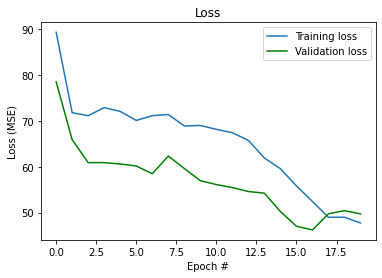

In [47]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MSE)')
plt.title('Loss')
plt.legend()

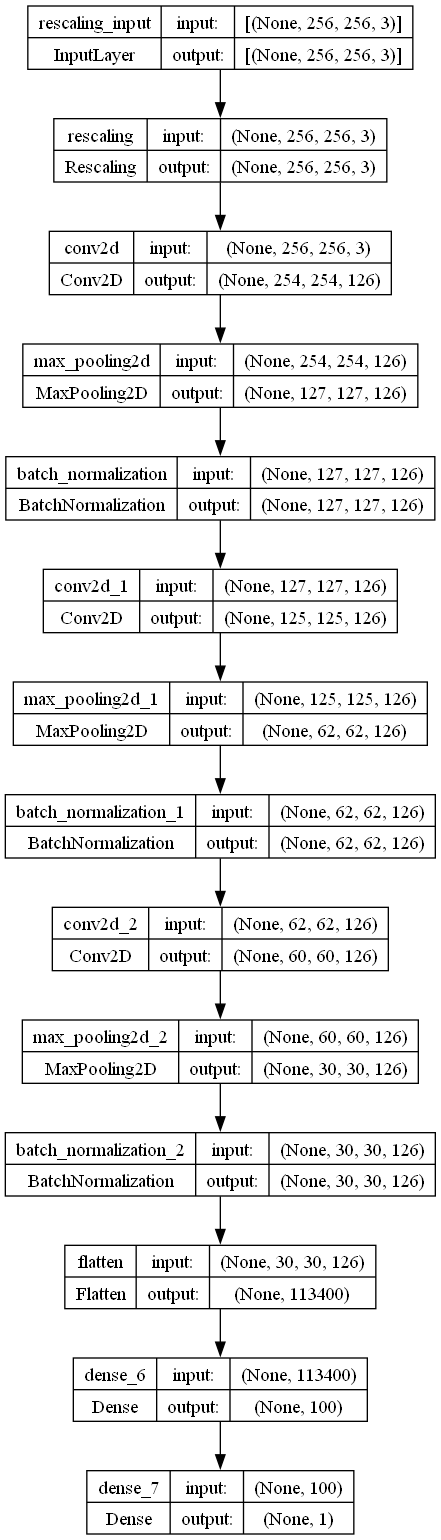

In [48]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

tf.keras.utils.plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Bevindingen</strong></h2>
</div>

### **Geef een samenvatting van de uitkomsten van het modelleren.**

| Model                              | Validatie-loss |
|------------------------------------|----------------|
| Fully-Connected Neuraal Netwerk   | 27.8668        |
| Convolutioneel Neuraal Netwerk    | 71.3398        |
| Transfer Learning model           | 70.5465        |
| Multimodaal netwerk               | 49.5974        |


Bij dit project hebben we gebruikgemaakt van vier modellen: het Fully-Connected Neuraal Netwerk, het Convolutioneel Neuraal Netwerk, Transfer Learning en het MultiModaal netwerk. De modellen hebben we beoordeeld aan de hand van een loss-maat, de Mean Absolute Percentage Error (MAPE). MAPE staat voor Mean Absolute Percentage Error, waarmee we de nauwkeurigheid van de voorspellingen kunnen meten. De loss moet altijd zo laag mogelijk zijn; bij een loss van 0 heeft het model alles perfect voorspeld.

Bij dit project presteerde het eerste model, het Fully-Connected Neuraal Netwerk, het beste met een validatie-loss van 27.87. We vermoeden dat dit komt doordat het model gebruikmaakt van duidelijke cijfers die invloed hebben op de prijs. Bij de andere modellen is er geen sprake van tabulaire data, maar van visuele data. Bij de tabulaire data is ook de locatie van de huizen meegenomen in de voorspelling. Huizen in het centrum zijn vaak duurder, maar toch kleiner. Dit verklaart dan ook het belang van de locatiedata die alleen is opgenomen bij het Fully-Connected Neuraal Netwerk.

De neuronen die de beste resultaten gaven voor het FCNN liepen aflopend van 128 naar 8 in 5 lagen, waarbij de outputlaag bestaat uit 1 neuron dat de voorspelde waarde (de prijs) aangeeft. In de outputlaag wordt de activatiefunctie lineair gebruikt omdat deze geen limiet heeft voor mogelijke uitvoerwaarden. Als we ook ReLU zouden gebruiken in de outputlaag, kan dit leiden tot plotselinge veranderingen in de voorspellingen.

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Conclusie en aanbevelingen</strong></h2>
</div>

### **Beschrijf het modelleringsproces voor deze opdracht. Wat waren de uitdagingen daarmee?**

Om te beginnen met het modelleringsproces zijn we eerst aan de slag gegaan met het inladen van de data. Vervolgens hebben we de data grondig bekeken en een exploratieve data-analyse (EDA) uitgevoerd om nog beter naar de data te kijken, uitschieters te identificeren en te bepalen of de data lineair of niet-lineair is. Hierdoor hebben we een beter beeld van de data gekregen. Daarna hebben we de data klaargemaakt voor deep learning.

Vervolgens zijn we begonnen met het maken van een Fully Connected Neural Network (FCNN). Hierbij was de uitdaging dat we voor het eerst volledig zelfstandig een neuraal netwerk moesten maken. Zo hebben we voor het eerste model ook goed moeten onderzoeken welke hyperparameters en het aantal epochs zorgden voor de beste prestaties. Door veel trial and error zijn we uiteindelijk tot een goed model gekomen dat niet meer over- of underfitted.

De volgende stap in ons modelleringsproces was het maken van ons tweede model: het Convolutional Neural Network (CNN). Hierbij gingen we voor het eerst aan de slag met het maken van een model dat wordt getraind aan de hand van afbeeldingen. De uitdaging hierbij was het bepalen van de resolutie en de batchgrootte van de afbeeldingen. We liepen namelijk tegen het probleem aan dat sommige teamleden het model niet konden uitvoeren met de standaardinstellingen. Na het aanpassen van de resolutie en de batchgrootte lukte dit wel. Door de batchgrootte te verkleinen, had het model meer tijd nodig tijdens het trainen. Bij dit model konden we ook niet veel epochs uitvoeren omdat het uitbreiden van het aantal epochs snel leidde tot overfitting.

Het derde model dat we hebben gemaakt was het transfer learning-model. Hierbij gingen we voor de tweede keer aan de slag met het maken van een model dat wordt getraind aan de hand van afbeeldingen, maar nu konden we ook gebruikmaken van voorgetrainde modellen. Het was echter nodig om te onderzoeken welk voorgetraind model het beste bij ons probleem paste. Verder was het ook een puzzel om te bepalen welke extra lagen we aan het model moesten toevoegen.

Als laatste zijn we aan de slag gegaan met het maken van ons multimodale model. Hierbij konden we alle beschikbare data gebruiken voor het trainen van ons model. De grootste uitdaging bij dit model was het begrijpen hoe we het model moesten maken. Uiteindelijk is het ons gelukt om het model werkend te krijgen, maar het resultaat was niet het slechtst maar ook niet het beste van de vier modellen.

### **In deze opdracht heb je verschillende modelarchitecturen uitgeprobeerd, en verschillende technieken om de prestaties te verbeteren. Welke van deze werkte het beste? Welke van deze werkte niet goed? Waarom denk je dat dat het geval was?**

In de opdracht hebben wij gebruik gemaakt van vier modellen. De eerste werkte het beste, namelijk het Fully-Connected Neuraal Netwerk. Deze had een validatie-loss van 27.87. Het slechtste model, Transfer Learning, had een validatie-loss van 95.09. Dit komt hoogstwaarschijnlijk doordat de FCNN gebruikmaakt van tabulaire data waar meer informatie in staat. Het Transfer Learning model maakt gebruik van de afbeeldingen, hierbij maakt het model zelf features. In de afbeeldingen staat geen informatie over de omgeving, vaak is het namelijk zo dat er in drukke steden huizen duurder zijn. Dit is niet in de afbeelding te zien en daardoor ontstaan er meer uitschieters. 

### **Welk advies kun je op basis hiervan geven aan een makelaar?**

Als makelaar is het raadzaam om het FCNN model te gebruiken als een hulpmiddel bij het bepalen van de prijs. Bij het gebruiken van dit model is het vooral geschikt voor het voorspellen op basis van locatie, hoeveelheid kamers en grootte van het huis. Wanneer er een hulpmiddel nodig is voor het uiterlijk van de kamers en welke prijs daarbij hoort, raden wij aan om gebruik te maken van het MultiModaal Netwerk. 

### **Welk advies kun je op basis hiervan geven aan potentiële huizenkopers of huizenverkopers?**

Het advies dat wij kopers en verkopers geven is dat zij bewust moeten zijn van externe factoren, zoals de omgeving van het huis. Dit is niet zichtbaar in de afbeeldingen. Al hoewel de binnenkant van de woning er goed uit ziet, is er een mogelijkheid dat de woning goedkoop is door de omgeving. De afbeeldingen kunnen niet alle aspecten vastleggen die de waarde van het huis beïvloeden. Denk aan winkels, openbaarvervoer en of er scholen in de buurt zijn.

Ook is het verstandig voor kopers en verkopers om genoeg informatiebronnen te raadplegen. Dit kan variëren van online  en lokale vastgoedportals. Om een goed rond beeld te krijgen van de markt en de waarde van een woning

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Bronnenlijst  </strong></h2>
</div>

Unzueta, D. (2022, 19 oktober). Fully Connected Layer vs. Convolutional Layer: Explained. Built In. https://builtin.com/machine-learning/fully-connected-layer

Wikipedia contributors. (2024, 20 maart). Convolutional neural network. Wikipedia. https://en.wikipedia.org/wiki/Convolutional_neural_network

Beeldclassificatie met CNNs. (2024). Brightspace. Geraadpleegd op 23 maart 2024, van https://brightspace.hhs.nl/d2l/le/lessons/56651/lessons/732216

# Transfer Learning bronnen

Donges, N. (2022, 12 september). What Is Transfer Learning? Exploring the Popular Deep Learning Approach. Built In. https://builtin.com/data-science/transfer-learning

Yan, K. (2023, 11 juli). These are the 5 best pre-trained neural networks - Kevin Yan - Medium. Medium. https://medium.com/@kyan7472/these-are-the-5-best-pre-trained-neural-networks-23798e61a043

Wikipedia contributors. (2024, 29 maart). ImageNet. Wikipedia. https://en.wikipedia.org/wiki/ImageNet

Team, C. (2023, 3 november). Why you should use Pre-Trained models versus building your own. Context By Cohere. https://txt.cohere.com/pre-trained-vs-in-house-nlp-models/

Baheti, P. (2023, 24 april). A Newbie-Friendly Guide to Transfer Learning. V7. https://www.v7labs.com/blog/transfer-learning-guide

